In [175]:
%matplotlib inline

import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import time
from sklearn.externals import joblib
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt

In [27]:
ratings = pd.read_csv("ratings_Electronics.csv",header=None,names=['userID','productID','rating','timestamp'])

In [61]:
ratings.head()

,userID,productID,rating,timestamp
94,A3BY5KCNQZXV5U,0594451647,5.0,1390176000
118,AT09WGFUM934H,0594481813,3.0,1377907200
177,A32HSNCNPRUMTR,0970407998,1.0,1319673600
178,A17HMM1M7T9PJ1,0970407998,4.0,1281744000
492,A3CLWR1UUZT6TG,0972683275,5.0,1373587200


In [62]:
ratings.dtypes

userID        object
productID     object
rating       float64
timestamp      int64
dtype: object

In [29]:
ratings.shape

(7824482, 4)

In [30]:
users = ratings['userID'].unique()

In [31]:
# No. of users
users.shape

(4201696,)

In [32]:
products = ratings['productID'].unique()

In [33]:
# No. of products
products.shape

(476002,)

In [34]:
# Range of Ratings
ratings['rating'].unique()

array([5., 1., 3., 2., 4.])

In [22]:
# Distribution of ratings

ratings.rating.value_counts()

5.0    4347541
4.0    1485781
1.0     901765
3.0     633073
2.0     456322
Name: rating, dtype: int64

C:\Users\gopin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


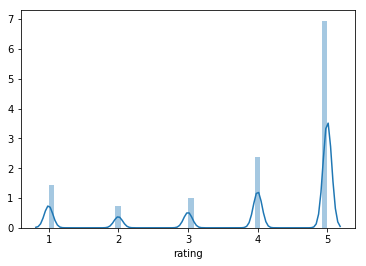

In [25]:
sns.distplot(ratings['rating'])

Rating of 5 is more predominat compared to other ratings. It is close to 4 times more frequent than the next best rating

In [26]:
# Check for NaNs in rating column
ratings[ratings.rating.isnull()]

,userid,productid,rating,timestamp


No NaN values found in the rating column

In [35]:
# Considering only the users who have rated more than 50 products
ratings = ratings[ratings.userID.isin(ratings['userID'].value_counts()[ratings['userID'].value_counts() > 49].index)]

In [36]:
ratings.head()

,userID,productID,rating,timestamp
94,A3BY5KCNQZXV5U,0594451647,5.0,1390176000
118,AT09WGFUM934H,0594481813,3.0,1377907200
177,A32HSNCNPRUMTR,0970407998,1.0,1319673600
178,A17HMM1M7T9PJ1,0970407998,4.0,1281744000
492,A3CLWR1UUZT6TG,0972683275,5.0,1373587200


In [37]:
ratings.shape

(125871, 4)

In [39]:
users = ratings['userID'].unique()
users.shape

(1540,)

In [40]:
products = ratings['productID'].unique()
products.shape

(48190,)

In [41]:
# Range of Ratings
ratings['rating'].unique()

array([5., 3., 1., 4., 2.])

In [42]:
# Distribution of ratings

ratings.rating.value_counts()

5.0    71034
4.0    32295
3.0    12060
2.0     5367
1.0     5115
Name: rating, dtype: int64

C:\Users\gopin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


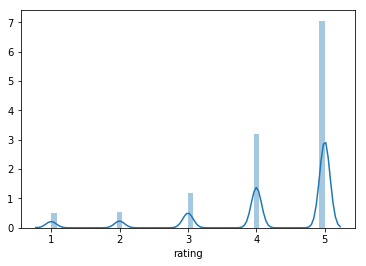

In [43]:
sns.distplot(ratings['rating'])

In [44]:
# Splitting the ratings dataset into train and test
trainDF, testDF = train_test_split(ratings, test_size=0.3, random_state=100)

In [45]:
trainDF.shape

(88109, 4)

In [46]:
trainDF.head()

,userID,productID,rating,timestamp
5993538,ANW6EGY12V5XS,B007ZW43IQ,4.0,1349049600
4459175,A1QVFHPY8418HC,B004T9Y0MW,5.0,1310774400
2177400,ALDAF4VVLFRHP,B001NOG2T0,4.0,1362787200
232287,A11YIHB6IW352W,B00007KDVI,5.0,1093564800
7811983,A3PD8JD9L4WEII,B00JGSWU7S,5.0,1402444800


In [47]:
testDF.shape

(37762, 4)

In [48]:
testDF.head()

,userID,productID,rating,timestamp
3071497,AWH2AY17ZU7W2,B0035JCI6M,3.0,1303776000
1270452,A2MSBIA18RXYQC,B000P1711K,1.0,1231977600
1506249,A1H98YV5K5BUX0,B000WZ7Y5C,5.0,1272240000
7709306,A2X8KN82L07RSK,B00GO4GMAI,5.0,1399507200
2570183,AU627A4UGIW6V,B002EPF6YO,4.0,1310947200


In [49]:
# Popularity Recommender Model

In [53]:
# For suggesting recommendations based on popularity a popularity score has to be defined
# Here as we have the user ratings for each item we can use the average rating as a recommendation score
# But an item rated 5 by one user may end up with high score than an item rated 4 by 10 users which doesnt justify the logic
# At the same time cannot use the most rated (no. of times) as the scoring parameter as a product bad 10 times may get high 
# score compared to product rated good two times.
# Hence going ahead with the average rating as the best parameter for scoring followed by no. of ratings as a tie breaker

In [81]:
trainDF_grouped = trainDF.groupby(['productID']).agg({'rating': 'mean','userID':'count'}).reset_index()

In [82]:
trainDF_grouped.head()

,productID,rating,userID
0,0594481813,3.0,1
1,0970407998,2.5,2
2,0972683275,5.0,2
3,1400501466,3.5,4
4,1400501520,5.0,1


In [86]:
trainDF_grouped.rename(columns = {'rating': 'score','userID':'noofratings'},inplace=True)

In [87]:
#Sort the songs based upon recommendation score and No. of ratings
trainDF_sort = trainDF_grouped.sort_values(['score', 'Noofratings'], ascending = [0,0])

In [89]:
trainDF_sort.head()

,productID,score,Noofratings
19597,B003ES5ZR8,5.0,20
7112,B000FQ2JLW,5.0,15
35136,B00CMJZAOI,5.0,15
14838,B001TH7GUA,5.0,13
27052,B005LDLP8W,5.0,13


In [90]:
#Generate a recommendation rank based upon score
trainDF_sort['Rank'] = trainDF_sort['score'].rank(ascending=0, method='first')

In [91]:
trainDF_sort.head()

,productID,score,Noofratings,Rank
19597,B003ES5ZR8,5.0,20,1.0
7112,B000FQ2JLW,5.0,15,2.0
35136,B00CMJZAOI,5.0,15,3.0
14838,B001TH7GUA,5.0,13,4.0
27052,B005LDLP8W,5.0,13,5.0


In [116]:
def recommend_popularity(predictions_df, userID, ratingsDF,num_recommendations=5):
    
    print ('User {0} has already rated {1} products.'.format(userID, ratingsDF.userID.value_counts()[userID]))
    print ('Recommending the highest {0} predicted ratings products not already rated.'.format(num_recommendations))
    
    # Recommend the highest predicted rating products that the user hasn't seen yet.
    
    productslist = ratingsDF[ratingsDF['userID']== userID]['productID'].tolist()
    
    user_recommendations = predictions_df[~predictions_df['productID'].isin(productslist)]
    
    user_recommendations['userID'] = userID
    
    #Bring user_id column to the front
    cols = user_recommendations.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    user_recommendations = user_recommendations[cols]
    user_recommendations = user_recommendations.head(num_recommendations)

    return user_recommendations

In [117]:
# Checking recommendations of the different users

users = ratings['userID'].unique()
userID = users[1]

In [123]:
user_recommendations_popularity = recommend_popularity(trainDF_sort, userID, trainDF,10)

User AT09WGFUM934H has already rated 76 products.
Recommending the highest 10 predicted ratings products not already rated.


C:\Users\gopin\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [124]:
user_recommendations_popularity

,userID,productID,score,Noofratings,Rank
19597,AT09WGFUM934H,B003ES5ZR8,5.0,20,1.0
7112,AT09WGFUM934H,B000FQ2JLW,5.0,15,2.0
35136,AT09WGFUM934H,B00CMJZAOI,5.0,15,3.0
14838,AT09WGFUM934H,B001TH7GUA,5.0,13,4.0
27052,AT09WGFUM934H,B005LDLP8W,5.0,13,5.0
7777,AT09WGFUM934H,B000IJY8DS,5.0,12,6.0
11162,AT09WGFUM934H,B0012Y6HC8,5.0,12,7.0
30178,AT09WGFUM934H,B007SZ0EOW,5.0,12,8.0
22028,AT09WGFUM934H,B0044YPN0A,5.0,11,9.0
30175,AT09WGFUM934H,B007SZ0E1K,5.0,11,10.0


In [125]:
user_recommendations_popularity = recommend_popularity(trainDF_sort, users[10], trainDF,10)

User A2XIOXRRYX0KZY has already rated 64 products.
Recommending the highest 10 predicted ratings products not already rated.


C:\Users\gopin\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [126]:
user_recommendations_popularity

,userID,productID,score,Noofratings,Rank
19597,A2XIOXRRYX0KZY,B003ES5ZR8,5.0,20,1.0
7112,A2XIOXRRYX0KZY,B000FQ2JLW,5.0,15,2.0
35136,A2XIOXRRYX0KZY,B00CMJZAOI,5.0,15,3.0
14838,A2XIOXRRYX0KZY,B001TH7GUA,5.0,13,4.0
27052,A2XIOXRRYX0KZY,B005LDLP8W,5.0,13,5.0
7777,A2XIOXRRYX0KZY,B000IJY8DS,5.0,12,6.0
11162,A2XIOXRRYX0KZY,B0012Y6HC8,5.0,12,7.0
30178,A2XIOXRRYX0KZY,B007SZ0EOW,5.0,12,8.0
22028,A2XIOXRRYX0KZY,B0044YPN0A,5.0,11,9.0
30175,A2XIOXRRYX0KZY,B007SZ0E1K,5.0,11,10.0


In [127]:
# Collaberative Filtering model

In [128]:
trainDF.head()

,userID,productID,rating,timestamp
5993538,ANW6EGY12V5XS,B007ZW43IQ,4.0,1349049600
4459175,A1QVFHPY8418HC,B004T9Y0MW,5.0,1310774400
2177400,ALDAF4VVLFRHP,B001NOG2T0,4.0,1362787200
232287,A11YIHB6IW352W,B00007KDVI,5.0,1093564800
7811983,A3PD8JD9L4WEII,B00JGSWU7S,5.0,1402444800


In [129]:
testDF.head()

,userID,productID,rating,timestamp
3071497,AWH2AY17ZU7W2,B0035JCI6M,3.0,1303776000
1270452,A2MSBIA18RXYQC,B000P1711K,1.0,1231977600
1506249,A1H98YV5K5BUX0,B000WZ7Y5C,5.0,1272240000
7709306,A2X8KN82L07RSK,B00GO4GMAI,5.0,1399507200
2570183,AU627A4UGIW6V,B002EPF6YO,4.0,1310947200


In [130]:
tempDF = testDF.copy()

In [131]:
tempDF.rating = np.nan

In [132]:
tempDF.head()

,userID,productID,rating,timestamp
3071497,AWH2AY17ZU7W2,B0035JCI6M,NaN,1303776000
1270452,A2MSBIA18RXYQC,B000P1711K,NaN,1231977600
1506249,A1H98YV5K5BUX0,B000WZ7Y5C,NaN,1272240000
7709306,A2X8KN82L07RSK,B00GO4GMAI,NaN,1399507200
2570183,AU627A4UGIW6V,B002EPF6YO,NaN,1310947200


In [133]:
ratings_new = pd.concat([trainDF, tempDF]).reset_index()

In [134]:
ratings_new.head()

,index,userID,productID,rating,timestamp
0,5993538,ANW6EGY12V5XS,B007ZW43IQ,4.0,1349049600
1,4459175,A1QVFHPY8418HC,B004T9Y0MW,5.0,1310774400
2,2177400,ALDAF4VVLFRHP,B001NOG2T0,4.0,1362787200
3,232287,A11YIHB6IW352W,B00007KDVI,5.0,1093564800
4,7811983,A3PD8JD9L4WEII,B00JGSWU7S,5.0,1402444800


In [135]:
ratings_new.shape

(125871, 5)

In [136]:
# Matrix factorization

R_df = ratings_new.pivot(index = 'userID', columns ='productID', values = 'rating').fillna(0)
R_df.tail()

productID,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userID,,,,,,,,,,,,,,,,,,,,,
AZBXKUH4AIW3X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZCE11PSTCH1L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZMY6E8B52L2T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZNUHQSHZHSUE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZOK5STV85FBJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [138]:
# Generate the predicted ratings using SVD with no.of singular values to be 50

from scipy.sparse.linalg import svds
U, sigma, Vt = svds(R_df, k = 50)

In [139]:
#diag
sigma = np.diag(sigma)

In [140]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = R_df.columns,index=R_df.index)

In [141]:
preds_df.head()

productID,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userID,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.001709,0.024331,0.005945,0.004351,0.010768,0.010768,0.001923,0.008695,0.008446,...,0.001809,-0.041331,0.004726,0.007982,0.051230,0.008768,0.000362,-0.051972,0.0,0.0
A100WO06OQR8BQ,0.0,-0.007123,-0.006289,0.120423,0.005043,-0.000187,-0.000187,-0.000186,0.036104,0.000422,...,0.000579,0.015339,-0.007341,-0.015440,-0.087229,-0.003496,0.005618,-0.037100,0.0,0.0
A105S56ODHGJEK,0.0,-0.004448,-0.004503,0.055088,0.010973,-0.003907,-0.003907,0.005015,-0.002699,-0.002317,...,-0.001212,-0.015249,0.000867,-0.058683,0.014585,-0.006548,-0.002190,0.053129,0.0,0.0
A105TOJ6LTVMBG,0.0,0.009681,0.000403,-0.012862,0.000396,0.001885,0.001885,-0.002139,0.000982,0.001151,...,0.000046,-0.035728,0.000947,-0.033231,-0.009888,0.004529,0.002712,-0.015924,0.0,0.0
A10AFVU66A79Y1,0.0,-0.000742,0.000242,0.060081,0.009237,0.000323,0.000323,0.001800,-0.001339,0.001406,...,0.000731,0.039402,0.001625,0.025449,-0.038492,-0.001391,-0.000709,0.053937,0.0,0.0


In [154]:
def recommend_movies_collaberative(predictions_df, userID, ratingsDF, num_recommendations=5):
    
    # Get and sort the user's predictions
    sorted_user_predictions = predictions_df.loc[userID].sort_values(ascending=False)
    sorted_user_predictions = pd.DataFrame(sorted_user_predictions).reset_index()
    sorted_user_predictions.rename(columns = {'productID': 'productID',userID:'score'},inplace=True)
    
    print ('User {0} has already rated {1} products.'.format(userID, ratingsDF.userID.value_counts()[userID]))
    print ('Recommending the highest {0} predicted ratings products not already rated.'.format(num_recommendations))
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    
    productslist = ratingsDF[ratingsDF['userID']== userID]['productID'].tolist()
    
    user_recommendations = sorted_user_predictions[~sorted_user_predictions['productID'].isin(productslist)]
    
    user_recommendations['userID'] = userID
    
    #Bring user_id column to the front
    cols = user_recommendations.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    user_recommendations = user_recommendations[cols]
    user_recommendations = user_recommendations.head(num_recommendations)
    
    
    return user_recommendations, sorted_user_predictions

In [ ]:
# Checking recommendations of the different users

userID = users[1]

In [156]:
predictions_collaberative, sorted_user_predictions = recommend_movies_collaberative(preds_df, userID, trainDF,10)

User AT09WGFUM934H has already rated 76 products.
Recommending the highest 10 predicted ratings products not already rated.


C:\Users\gopin\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [158]:
predictions_collaberative

,userID,productID,score
1,AT09WGFUM934H,B002WE6D44,1.158196
3,AT09WGFUM934H,B002V88HFE,1.019561
4,AT09WGFUM934H,B0019EHU8G,0.995162
6,AT09WGFUM934H,B001TH7GUU,0.856530
9,AT09WGFUM934H,B000N99BBC,0.740868
10,AT09WGFUM934H,B00E3W15P0,0.711937
11,AT09WGFUM934H,B000Q8UAWY,0.708617
12,AT09WGFUM934H,B001CIREXA,0.688915
13,AT09WGFUM934H,B001XURP7W,0.665945
14,AT09WGFUM934H,B0041Q38NU,0.646435


In [159]:
sorted_user_predictions

,productID,score
0,B007WTAJTO,3.684596
1,B002WE6D44,1.158196
2,B005CT56F8,1.082892
3,B002V88HFE,1.019561
4,B0019EHU8G,0.995162
5,B000QUUFRW,0.970723
6,B001TH7GUU,0.856530
7,B00BQ4F9ZA,0.758437
8,B003M0NURK,0.740992
9,B000N99BBC,0.740868


In [160]:
predictions_collaberative, sorted_user_predictions = recommend_movies_collaberative(preds_df, users[10], trainDF,10)

User A2XIOXRRYX0KZY has already rated 64 products.
Recommending the highest 10 predicted ratings products not already rated.


C:\Users\gopin\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [161]:
predictions_collaberative

,userID,productID,score
2,A2XIOXRRYX0KZY,B0079UAT0A,1.472800
3,A2XIOXRRYX0KZY,B000N99BBC,1.430677
5,A2XIOXRRYX0KZY,B004CLYEFK,1.133772
7,A2XIOXRRYX0KZY,B008X9ZBVI,1.045936
9,A2XIOXRRYX0KZY,B00A7PPLP2,0.957480
10,A2XIOXRRYX0KZY,B008X9Z8NE,0.953317
11,A2XIOXRRYX0KZY,B008ULPAT2,0.928608
12,A2XIOXRRYX0KZY,B008X9Z7N0,0.897347
14,A2XIOXRRYX0KZY,B008DWCRQW,0.865450
17,A2XIOXRRYX0KZY,B00DQZOD8Q,0.757177


In [162]:
sorted_user_predictions

,productID,score
0,B004CLYEDC,1.836361
1,B009NHWVIA,1.632557
2,B0079UAT0A,1.472800
3,B000N99BBC,1.430677
4,B004CLYEH8,1.172551
5,B004CLYEFK,1.133772
6,B0097CZHAU,1.118598
7,B008X9ZBVI,1.045936
8,B004CLYEE6,1.025351
9,B00A7PPLP2,0.957480


In [163]:
# Evaluation of the Collaberative Filter Model using RMSE

In [164]:
# Predictions made

preds_df.head()

productID,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userID,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.001709,0.024331,0.005945,0.004351,0.010768,0.010768,0.001923,0.008695,0.008446,...,0.001809,-0.041331,0.004726,0.007982,0.051230,0.008768,0.000362,-0.051972,0.0,0.0
A100WO06OQR8BQ,0.0,-0.007123,-0.006289,0.120423,0.005043,-0.000187,-0.000187,-0.000186,0.036104,0.000422,...,0.000579,0.015339,-0.007341,-0.015440,-0.087229,-0.003496,0.005618,-0.037100,0.0,0.0
A105S56ODHGJEK,0.0,-0.004448,-0.004503,0.055088,0.010973,-0.003907,-0.003907,0.005015,-0.002699,-0.002317,...,-0.001212,-0.015249,0.000867,-0.058683,0.014585,-0.006548,-0.002190,0.053129,0.0,0.0
A105TOJ6LTVMBG,0.0,0.009681,0.000403,-0.012862,0.000396,0.001885,0.001885,-0.002139,0.000982,0.001151,...,0.000046,-0.035728,0.000947,-0.033231,-0.009888,0.004529,0.002712,-0.015924,0.0,0.0
A10AFVU66A79Y1,0.0,-0.000742,0.000242,0.060081,0.009237,0.000323,0.000323,0.001800,-0.001339,0.001406,...,0.000731,0.039402,0.001625,0.025449,-0.038492,-0.001391,-0.000709,0.053937,0.0,0.0


In [165]:
preds_df.shape

(1540, 48190)

In [166]:
# Original Ratings
Original_Ratings_df = ratings.pivot(index = 'userID', columns ='productID', values = 'rating').fillna(0)

In [167]:
Original_Ratings_df.head()

productID,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userID,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [169]:
Original_Ratings_df.shape

(1540, 48190)

In [176]:
MSE = mean_squared_error(preds_df, Original_Ratings_df)
RMSE = round(sqrt(MSE),3)
print("RMSE using Collaberative Filtering approach is: {0}".format(RMSE))

RMSE using Collaberative Filtering approach is: 0.172


Couldn't calculate RMSE for Popularity Recommender as the ratings are not calculated in that approach and recommendations are given based on the popular recommender score

# Final Output

In [177]:
# Top 5 recommendation using Collaberative Filatering Model

predictions_collaberative, sorted_user_predictions = recommend_movies_collaberative(preds_df, users[101], trainDF,5)


User AKT8TGIT6VVZ5 has already rated 137 products.
Recommending the highest 5 predicted ratings products not already rated.


C:\Users\gopin\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [178]:
predictions_collaberative

,userID,productID,score
136,AKT8TGIT6VVZ5,B006DEBYWU,1.682807
137,AKT8TGIT6VVZ5,B004CLYEH8,1.606114
138,AKT8TGIT6VVZ5,B00004ZCJE,1.552458
139,AKT8TGIT6VVZ5,B00007E7JU,1.489482
140,AKT8TGIT6VVZ5,B000HJPK2C,1.201366


In [179]:
# Top 5 recommendation for the same user using Popularity Recommender Model

user_recommendations_popularity = recommend_popularity(trainDF_sort, users[101], trainDF,5)


User AKT8TGIT6VVZ5 has already rated 137 products.
Recommending the highest 5 predicted ratings products not already rated.


C:\Users\gopin\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [180]:
user_recommendations_popularity

,userID,productID,score,Noofratings,Rank
19597,AKT8TGIT6VVZ5,B003ES5ZR8,5.0,20,1.0
7112,AKT8TGIT6VVZ5,B000FQ2JLW,5.0,15,2.0
35136,AKT8TGIT6VVZ5,B00CMJZAOI,5.0,15,3.0
14838,AKT8TGIT6VVZ5,B001TH7GUA,5.0,13,4.0
27052,AKT8TGIT6VVZ5,B005LDLP8W,5.0,13,5.0


It can be seen that recommendations given by both these models are completely different for the same user. The reason being the popularity recommender recommends the most popular irrespective of user interests whereas collaberative model takes users interests(latent features) into consideration and recommends accordingly